In [1]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the file into a pandas DataFrame
data = pd.read_excel("C:/Users/leopo/Desktop/Springboard-Capstone-2/Data/default_of_credit_card_clients.xls")
# Displaying the first rows of the DataFrame
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
#Remove the ID column
data = data.drop('ID', axis=1)
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
# Displaying information about the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

In [5]:
# Displaying summary statistics of the numerical columns in the DataFrame
data.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [6]:
# Checking for missing values in the DataFrame
data.isna().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [7]:
# Renaming columns for better readability
data = data.rename(columns={
    'PAY_0' : 'repayment_status_sept',
    'PAY_2' : 'repayment_status_aug',
    'PAY_3' : 'repayment_status_july',
    'PAY_4' : 'repayment_status_june',
    'PAY_5' : 'repayment_status_may',
    'PAY_6' : 'repayment_status_april',
    'BILL_AMT1': 'bill_sept',
    'BILL_AMT2' : 'bill_aug',
    'BILL_AMT3' : 'bill_july',
    'BILL_AMT4' : 'bill_june',
    'BILL_AMT5' : 'bill_may',
    'BILL_AMT6': 'bill_april',
    'PAY_AMT1' : 'previous_payment_sept',
    'PAY_AMT2' : 'previous_payment_aug',
    'PAY_AMT3' : 'previous_payment_july',
    'PAY_AMT4' : 'previous_payment_june',
    'PAY_AMT5' : 'previous_payment_may',
    'PAY_AMT6' : 'previous_payment_april',
    'default payment next month' : 'default'
})

In [8]:
data.head(15)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,repayment_status_sept,repayment_status_aug,repayment_status_july,repayment_status_june,repayment_status_may,...,bill_june,bill_may,bill_april,previous_payment_sept,previous_payment_aug,previous_payment_july,previous_payment_june,previous_payment_may,previous_payment_april,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,500000,1,1,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,100000,2,2,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,140000,2,3,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,20000,1,3,2,35,-2,-2,-2,-2,-1,...,0,13007,13912,0,0,0,13007,1122,0,0


<Axes: >

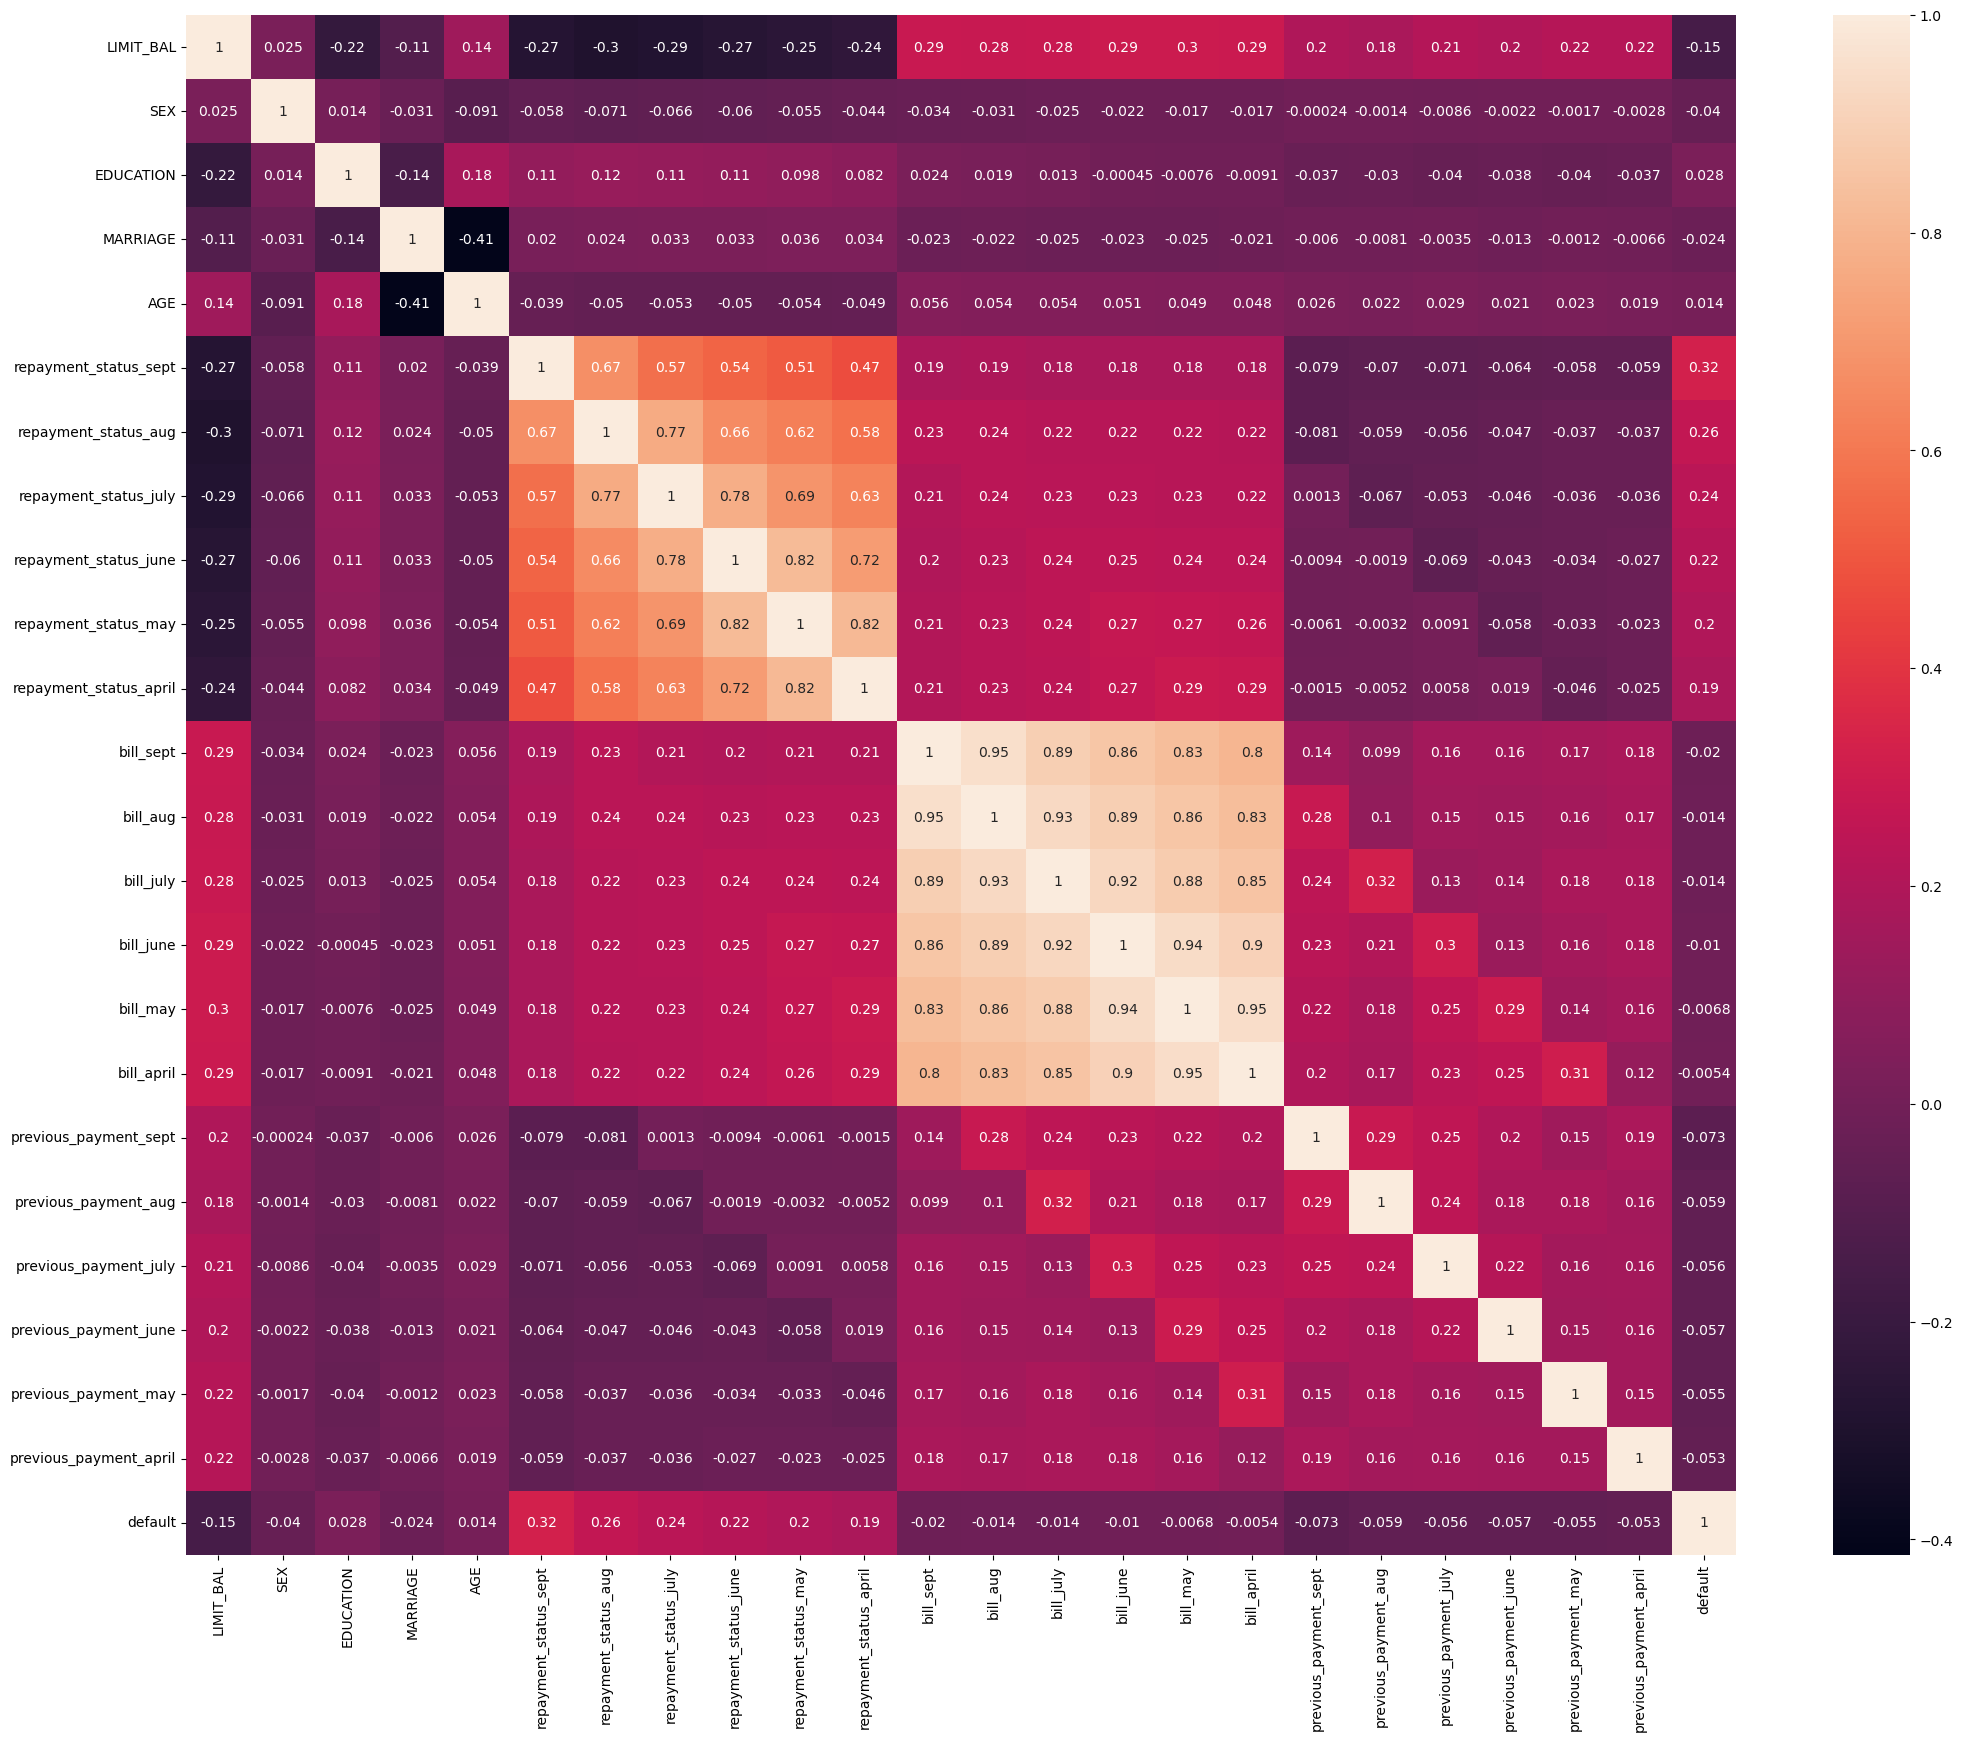

In [9]:
plt.figure(figsize=(25, 20))
sns.heatmap(data.corr(), annot=True)

In [10]:
# Counting the number of occurrences of each value in the 'SEX' column
data['SEX'].value_counts()

SEX
2    18112
1    11888
Name: count, dtype: int64

In [11]:
# Counting the number of occurrences of each value in the 'EDUCATION' column
data['EDUCATION'].value_counts()

EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64

In [12]:
# Replacing certain values in the 'EDUCATION' column for better categorization
data['EDUCATION'] = data['EDUCATION'].replace([4, 5, 6], 0)

In [13]:
data['EDUCATION'].value_counts()

EDUCATION
2    14030
1    10585
3     4917
0      468
Name: count, dtype: int64

In [14]:
# Counting the number of occurrences of each value in the 'MARRIAGE' column
data['MARRIAGE'].value_counts()

MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64

In [15]:
# Convert 'SEX', 'EDUCATION', and 'MARRIAGE' to categorical variables and Convert 'default' to binary (0 or 1)
data['SEX'] = data['SEX'].astype('category')
data['EDUCATION'] = data['EDUCATION'].astype('category')
data['MARRIAGE'] = data['MARRIAGE'].astype('category')
data['default'] = data['default'].astype('category')
# Displaying the updated DataFrame with categorical variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   LIMIT_BAL               30000 non-null  int64   
 1   SEX                     30000 non-null  category
 2   EDUCATION               30000 non-null  category
 3   MARRIAGE                30000 non-null  category
 4   AGE                     30000 non-null  int64   
 5   repayment_status_sept   30000 non-null  int64   
 6   repayment_status_aug    30000 non-null  int64   
 7   repayment_status_july   30000 non-null  int64   
 8   repayment_status_june   30000 non-null  int64   
 9   repayment_status_may    30000 non-null  int64   
 10  repayment_status_april  30000 non-null  int64   
 11  bill_sept               30000 non-null  int64   
 12  bill_aug                30000 non-null  int64   
 13  bill_july               30000 non-null  int64   
 14  bill_june             

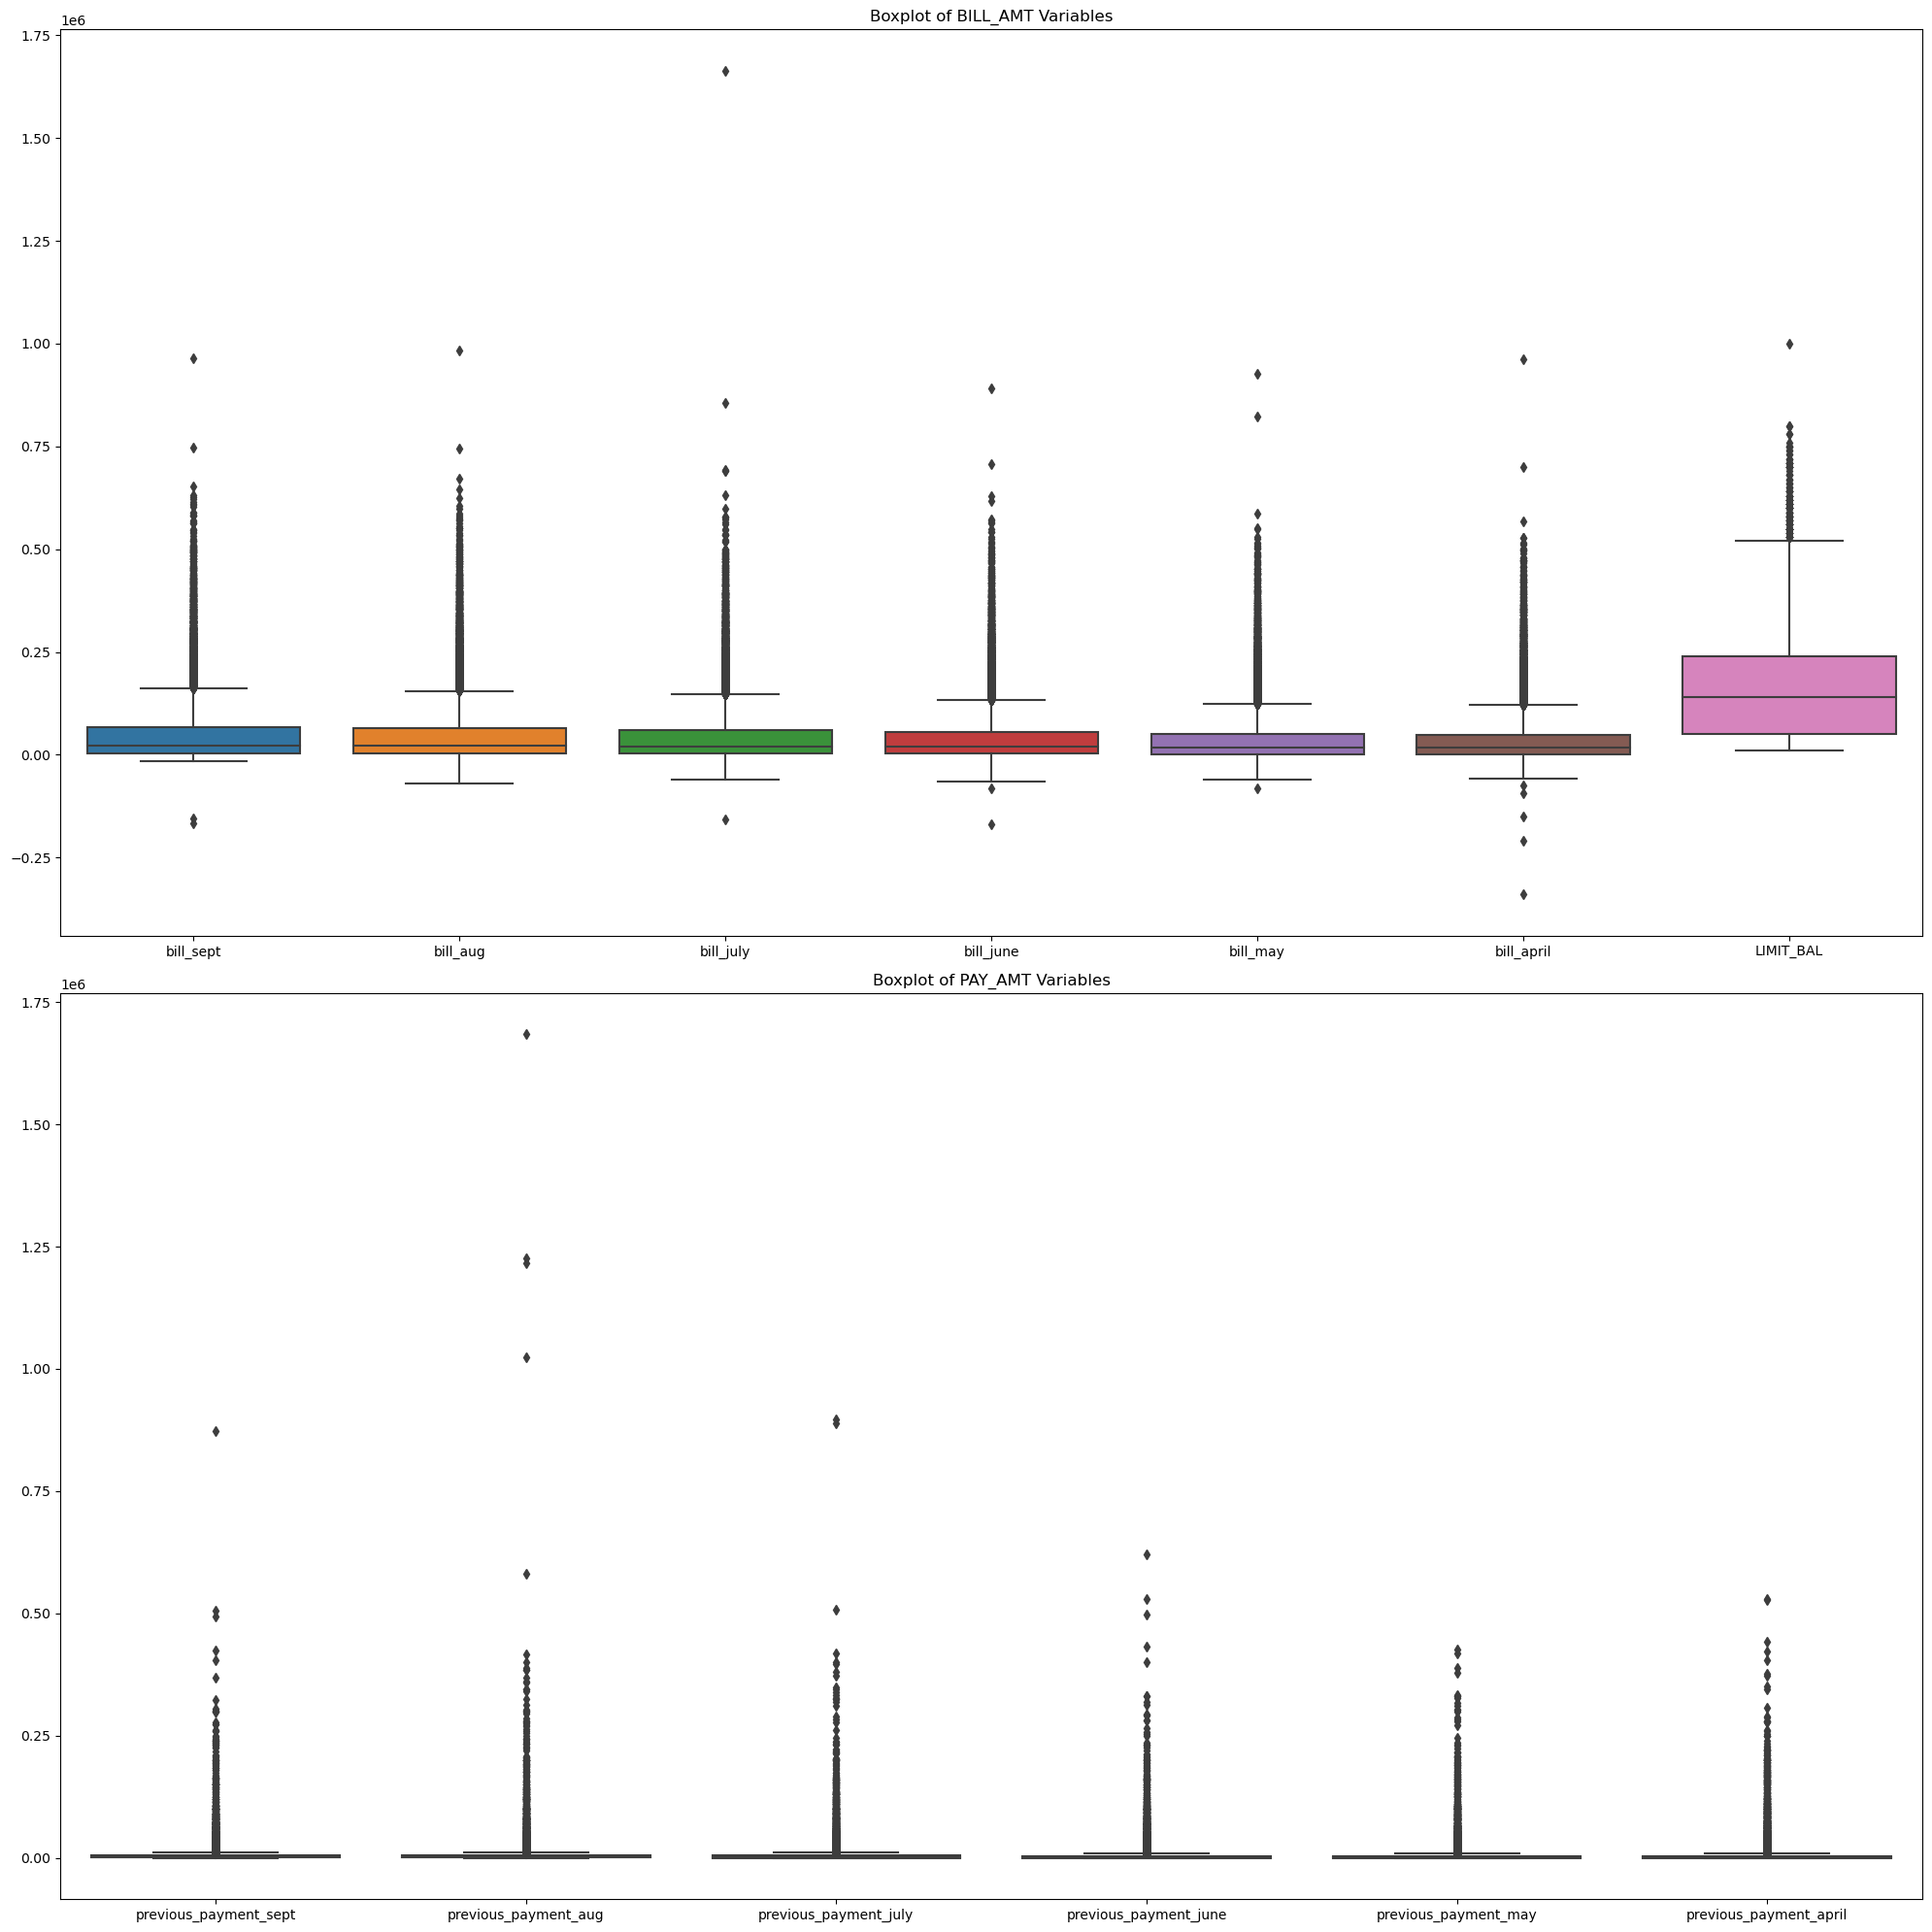

In [16]:
#Boxplot to vizualize outliers
# Selecting relevant columns
bill_amt_columns = ['bill_sept', 'bill_aug', 'bill_july', 'bill_june', 'bill_may', 'bill_april','LIMIT_BAL']
pay_amt_columns = ['previous_payment_sept', 'previous_payment_aug', 'previous_payment_july', 'previous_payment_june', 'previous_payment_may', 'previous_payment_april']

# Creating subplots for boxplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 20))

# Boxplot for BILL_AMT variables
sns.boxplot(data=data[bill_amt_columns], ax=axes[0])
axes[0].set_title('Boxplot of BILL_AMT Variables')

# Boxplot for PAY_AMT variables
sns.boxplot(data=data[pay_amt_columns], ax=axes[1])
axes[1].set_title('Boxplot of PAY_AMT Variables')

plt.tight_layout()
plt.show()

In [17]:
#remove observation that have zeros on every bill_AMT 1 to 6
data = data[data[bill_amt_columns].sum(axis=1) != 0]
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,repayment_status_sept,repayment_status_aug,repayment_status_july,repayment_status_june,repayment_status_may,...,bill_june,bill_may,bill_april,previous_payment_sept,previous_payment_aug,previous_payment_july,previous_payment_june,previous_payment_may,previous_payment_april,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [18]:
list = ['bill_sept', 'bill_aug', 'bill_july', 'bill_june', 'bill_may', 'bill_april','LIMIT_BAL','previous_payment_sept', 'previous_payment_aug', 'previous_payment_july', 'previous_payment_june', 'previous_payment_may', 'previous_payment_april']

for i in list:
    data.loc[data[i]>=data[i].quantile(0.95),i]=data[i].quantile(0.95)


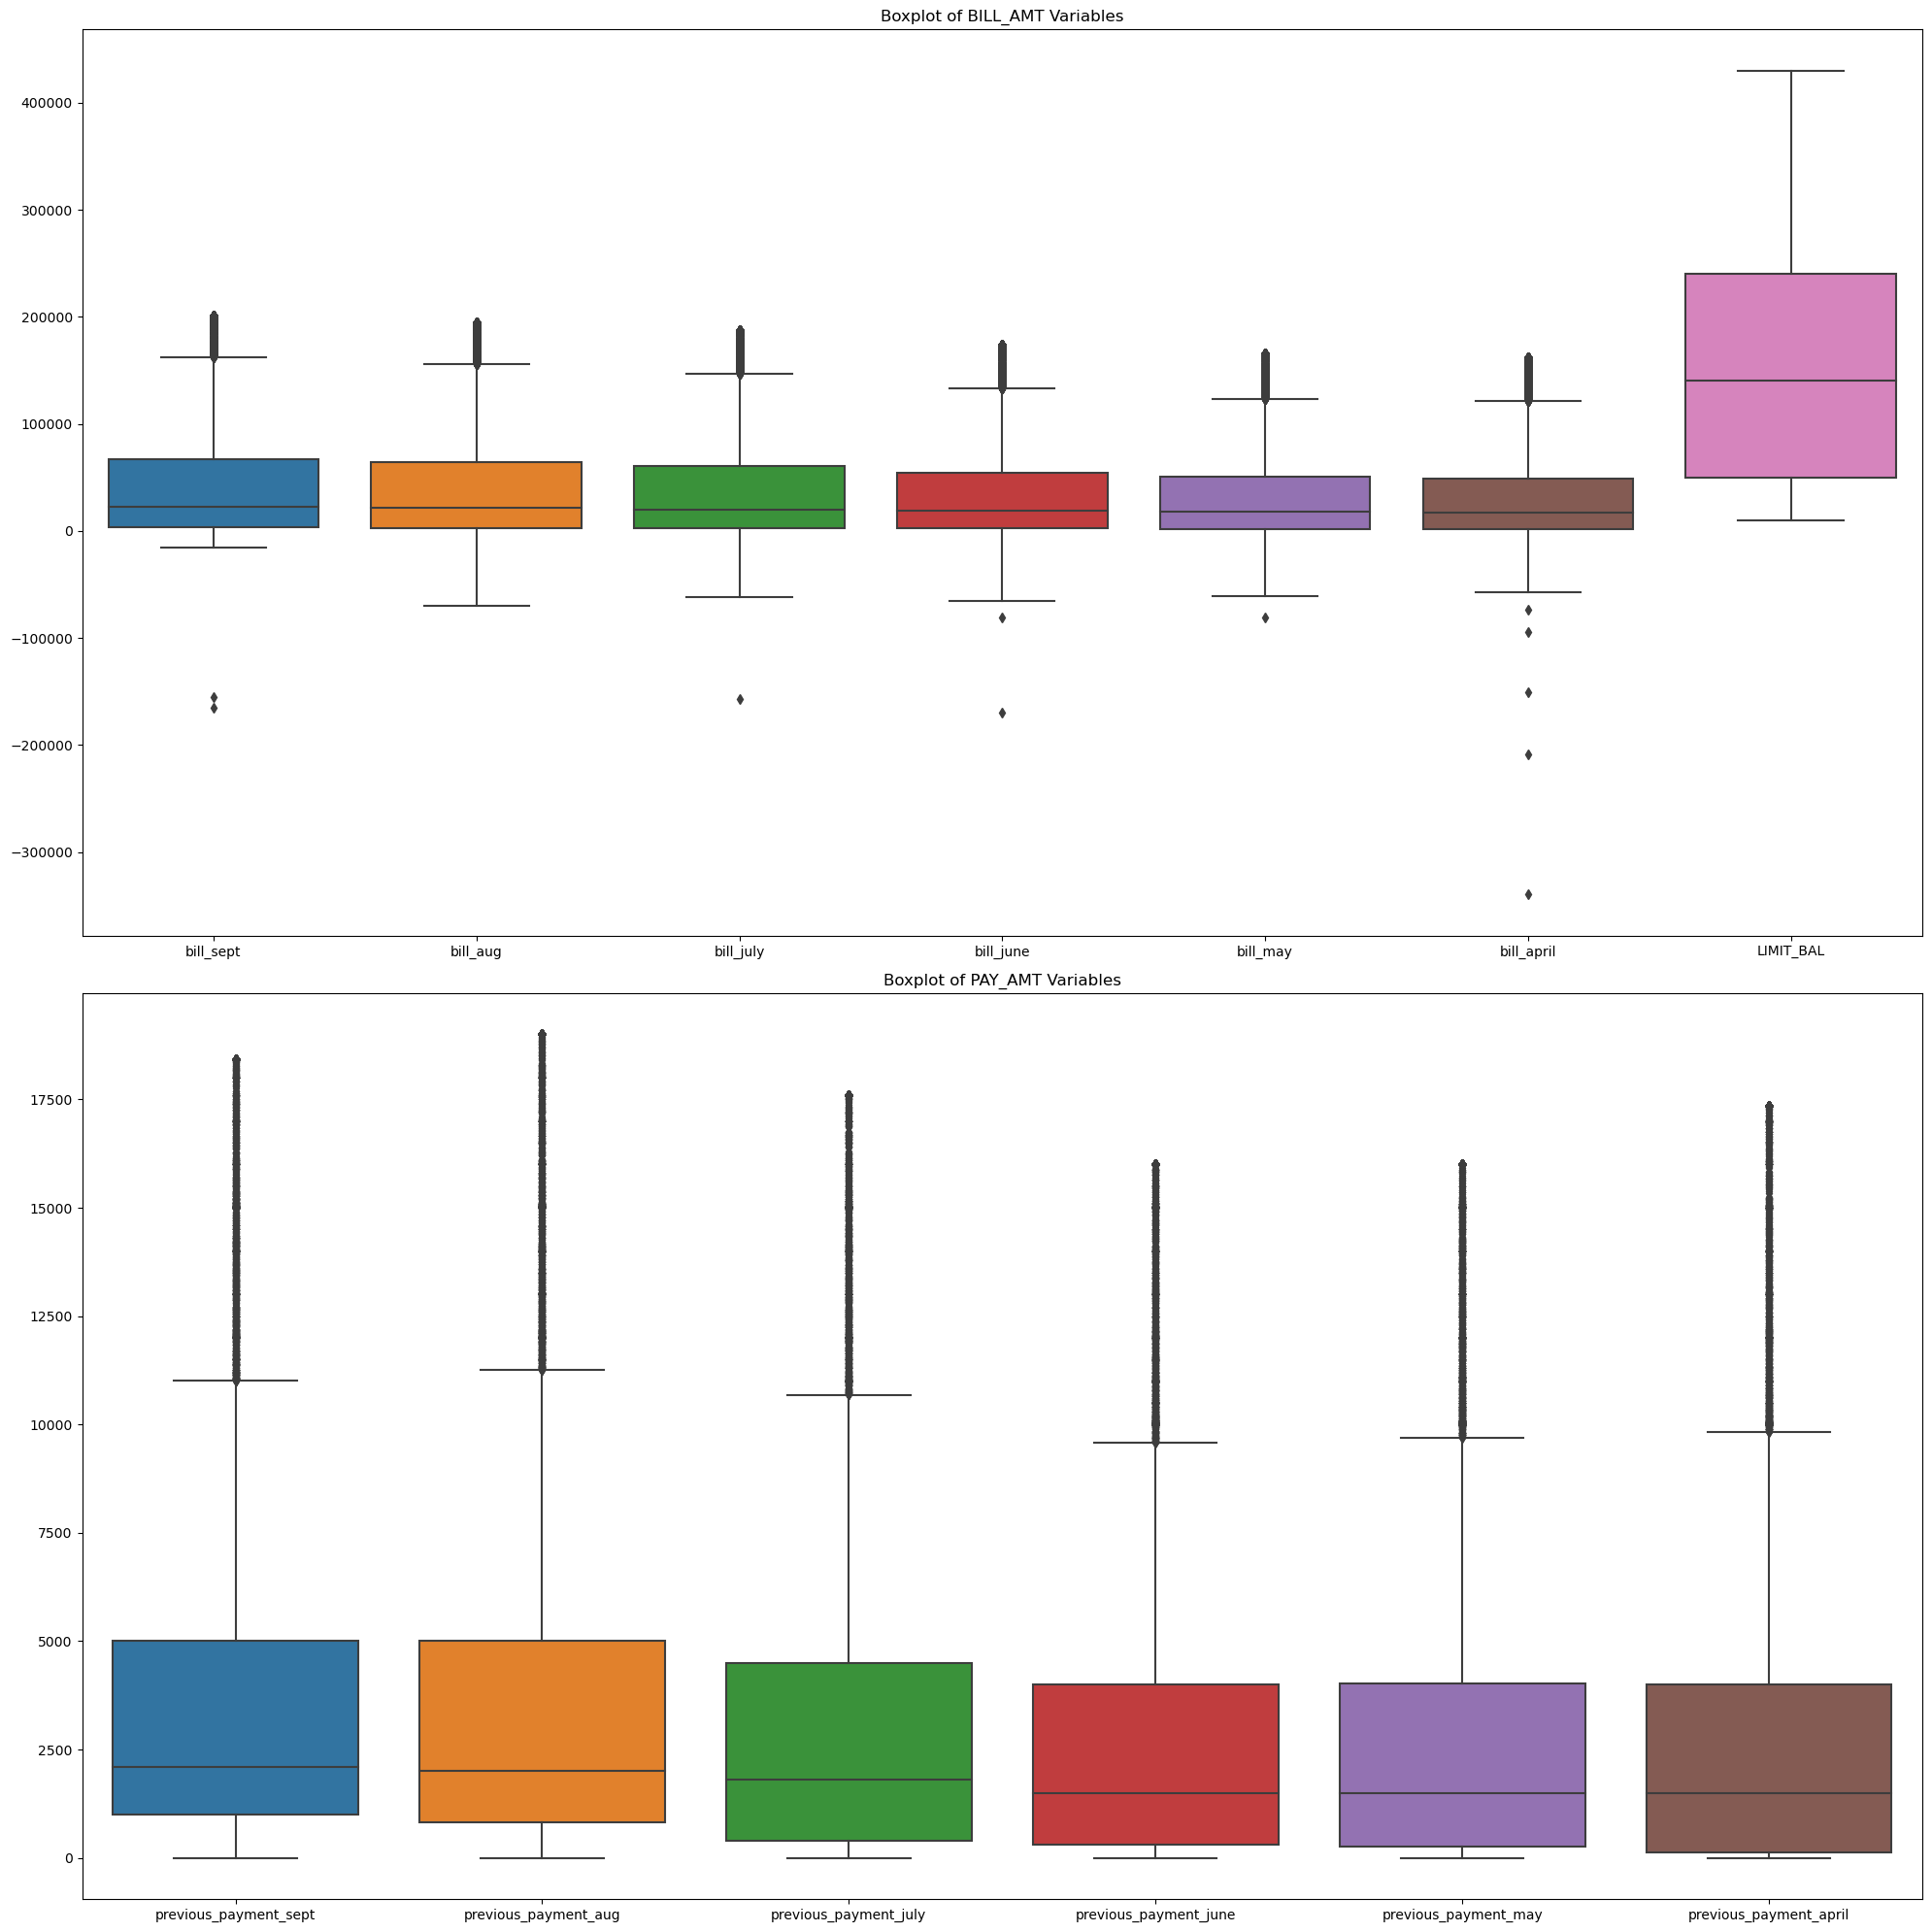

In [19]:
#Boxplot to vizualize outliers
# Selecting relevant columns
bill_amt_columns = ['bill_sept', 'bill_aug', 'bill_july', 'bill_june', 'bill_may', 'bill_april','LIMIT_BAL']
pay_amt_columns = ['previous_payment_sept', 'previous_payment_aug', 'previous_payment_july', 'previous_payment_june', 'previous_payment_may', 'previous_payment_april']

# Creating subplots for boxplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 20))

# Boxplot for BILL_AMT variables
sns.boxplot(data=data[bill_amt_columns], ax=axes[0])
axes[0].set_title('Boxplot of BILL_AMT Variables')

# Boxplot for PAY_AMT variables
sns.boxplot(data=data[pay_amt_columns], ax=axes[1])
axes[1].set_title('Boxplot of PAY_AMT Variables')

plt.tight_layout()
plt.show()

In [20]:
data.shape

(30000, 24)

In [23]:
data['default'].value_counts(normalize=True)

default
0    0.7788
1    0.2212
Name: proportion, dtype: float64

In [21]:
# save the data to a new csv file
csv_file_path = "C:/Users/leopo/Desktop/Springboard-Capstone-2/Data/data_cleaned.csv"
data.to_csv(csv_file_path, index=False)